In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.0 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionResNetV2
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from sklearn.metrics import accuracy_score, confusion_matrix
from mtcnn import MTCNN
import cv2

In [ ]:
train_data_dir = '/content/drive/MyDrive/Images/dataset/train'
test_data_dir = '/content/drive/MyDrive/Images/dataset/test'

In [ ]:
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)

In [ ]:
batch_size = 32

# Preprocessing and data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Generator for training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 200 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 200 images belonging to 2 classes.


In [ ]:
base_model = InceptionResNetV2(weights='imagenet', include_top=False)

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid')(x)

# Model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# MTCNN for face detection
detector = MTCNN()

In [ ]:
def preprocess_image_mtcnn(image_path):
    img = cv2.imread(image_path)
    result = detector.detect_faces(img)
    if result:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        resized_img = cv2.resize(cropped_img, (img_width, img_height))
        return resized_img
    else:
        return None

In [ ]:
history_mtcnn = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/10
6/6 [==============================] - 302s 40s/step - loss: 0.9132 - accuracy: 0.6726 - val_loss: 8.8830 - val_accuracy: 0.5052
Epoch 2/10
6/6 [==============================] - 227s 43s/step - loss: 0.6004 - accuracy: 0.8095 - val_loss: 7.7893 - val_accuracy: 0.5312
Epoch 3/10
6/6 [==============================] - 286s 49s/step - loss: 0.2662 - accuracy: 0.8906 - val_loss: 7.9393 - val_accuracy: 0.5000
Epoch 4/10
6/6 [==============================] - 225s 38s/step - loss: 0.1537 - accuracy: 0.9405 - val_loss: 5.9424 - val_accuracy: 0.4896
Epoch 5/10
6/6 [==============================] - 257s 44s/step - loss: 0.0615 - accuracy: 0.9762 - val_loss: 3.2431 - val_accuracy: 0.5000
Epoch 6/10
6/6 [==============================] - 258s 45s/step - loss: 0.0726 - accuracy: 0.9762 - val_loss: 1.0560 - val_accuracy: 0.7292
Epoch 7/10
6/6 [==============================] - 261s 45s/step - loss: 0.0939 - accuracy: 0.9881 - val_loss: 1.6428 - val_accuracy: 0.6458
Epoch 8/10
6/6 [====

In [ ]:
def load_images_mtcnn(image_paths):
    images = []
    labels = []
    for path in image_paths:
        img = preprocess_image_mtcnn(path)
        if img is not None:
            images.append(img)
            labels.append(1 if 'real' in path else 0)
    return np.array(images), np.array(labels)

In [ ]:
test_image_paths = [os.path.join(test_data_dir, label, img_name) for label in os.listdir(test_data_dir) for img_name in os.listdir(os.path.join(test_data_dir, label))]
X_test_mtcnn, y_test_mtcnn = load_images_mtcnn(test_image_paths)
y_pred_mtcnn = model.predict(X_test_mtcnn)
y_pred_mtcnn = np.round(y_pred_mtcnn)
accuracy_mtcnn = accuracy_score(y_test_mtcnn, y_pred_mtcnn)
print("Accuracy with MTCNN:", accuracy_mtcnn)

1/1 [==============================] - 0s 257ms/step


6/6 [==============================] - 55s 8s/step
Accuracy with MTCNN: 0.5056818181818182


In [ ]:
cm_mtcnn = confusion_matrix(y_test_mtcnn, y_pred_mtcnn)
print("Confusion Matrix with MTCNN:")
print(cm_mtcnn)

Confusion Matrix with MTCNN:
[[ 0 87]
 [ 0 89]]


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/10
6/6 [==============================] - 277s 49s/step - loss: 0.1023 - accuracy: 0.9702 - val_loss: 2.4291 - val_accuracy: 0.6094
Epoch 2/10
6/6 [==============================] - 259s 49s/step - loss: 0.0502 - accuracy: 0.9762 - val_loss: 23.7325 - val_accuracy: 0.4948
Epoch 3/10
6/6 [==============================] - 263s 51s/step - loss: 0.0506 - accuracy: 0.9702 - val_loss: 26.7941 - val_accuracy: 0.5104
Epoch 4/10
6/6 [==============================] - 231s 39s/step - loss: 0.0298 - accuracy: 0.9821 - val_loss: 1.4361 - val_accuracy: 0.6302
Epoch 5/10
6/6 [==============================] - 260s 45s/step - loss: 0.0506 - accuracy: 0.9702 - val_loss: 1.1486 - val_accuracy: 0.6667
Epoch 6/10
6/6 [==============================] - 258s 45s/step - loss: 0.1110 - accuracy: 0.9821 - val_loss: 1.0354 - val_accuracy: 0.7240
Epoch 7/10
6/6 [==============================] - 250s 43s/step - loss: 0.0226 - accuracy: 0.9881 - val_loss: 1.1198 - val_accuracy: 0.6927
Epoch 8/10
6/6 [==

In [ ]:
test_generator.reset()
y_pred = model.predict(test_generator, steps=test_generator.samples // batch_size)
y_pred = np.round(y_pred)
y_true = test_generator.classes

6/6 [==============================] - 64s 9s/step
Accuracy with InceptionResNet V2 0.73


In [ ]:
y_pred = y_pred[:100]
y_true = y_true[:100]
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy with InceptionResNet V2:", accuracy*100,"%")

Accuracy with InceptionResNet V2: 73.0 %


In [ ]:
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix with InceptionResNet V2")
print(cm)

Confusion Matrix with InceptionResNet V2
[[73 27]
 [ 0  0]]


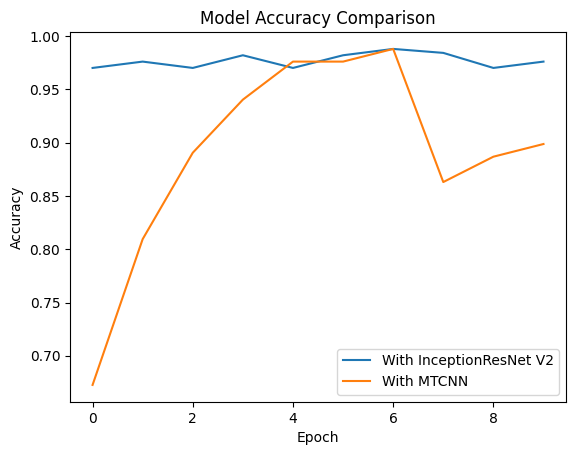

In [ ]:
plt.plot(history.history['accuracy'], label='With InceptionResNet V2')
plt.plot(history_mtcnn.history['accuracy'], label='With MTCNN')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()